In [1]:
import numpy as np
import gensim
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Using TensorFlow backend.


In [2]:
f = open('../../data/input.txt')
ds = f.read()
f.close()

In [12]:
syms = ['"', ';', ':', ',', '?', '!', '&', '(', ')', '[', ']', "'", '$', '@', '~', '-', '#']
syms_2 = ['\n', '\t', '_', '>', '<', '      ']

In [13]:
data = []
for ix in ds.split('.')[:]:
    val = ix
    for s in syms:
        val = val.strip().replace(s, '')
    for s in syms_2:
        val = val.strip().replace(s, ' ')
    
    if len(val) < 500 and len(val) > 40:
        data.append(val.lower())
    # print '-'*50
# print data

In [14]:
for ix in data[-10:]:
    print [ix]

['but its gods own wind none the less and a cleaner better stronger land will lie in the sunshine when the storm has cleared']
['start her up watson for its time that we were on our way']
['i have a check for five hundred pounds which should be cashed early for the drawer is quite capable of stopping it if he can']
['this text is provided to you asis without any warranty']
['no warranties of any kind expressed or implied are made to you as to the text or any medium it may be on including but not limited to warranties of merchantablity or fitness for a particular purpose']
['pictures for the adventure of the dancing men the adventure of the priory school the adventure of the golden pincenez and the adventure of the missing threequarter were taken from a 1911 edition of the the memoirs of sherlock holmes by smith elder  co']
['pictures for the adventure of the dancing men were taken from a 1915 edition of the return of sherlock holmes by smith elder  co']
['this text was formatted from v

In [ ]:
# f = np.unique(data, return_counts=True)

In [ ]:
#plt.figure(0, figsize=(10, 10))
#plt.plot(f[0], f[1])

In [15]:
train = []
for ix in data[:]:
    train.append(ix.lower().split())
    #print '-'*80

In [16]:
train[-1]

['this', 'text', 'comes', 'from', 'the', 'collections', 'version', '3']

In [17]:
model = gensim.models.Word2Vec(train, workers=6, iter=20)

In [21]:
model.similar_by_word('telegram')

[('message', 0.7985724806785583),
 ('letter', 0.7867898941040039),
 ('note', 0.7441037893295288),
 ('wire', 0.6155003309249878),
 ('advertisement', 0.5953078269958496),
 ('diary', 0.5603066682815552),
 ('doctor', 0.5524698495864868),
 ('cabman', 0.5480598211288452),
 ('train', 0.5430001020431519),
 ('cab', 0.5420347452163696)]

In [25]:
w = 'horse car engine travel'.split()
# model.similarity?

In [26]:
m = np.zeros((len(w), len(w)))
for ix in range(len(w)):
    for wx in range(len(w)):
        m[ix, wx] = model.similarity(w[ix], w[wx])

['horse', 'car', 'engine', 'travel']


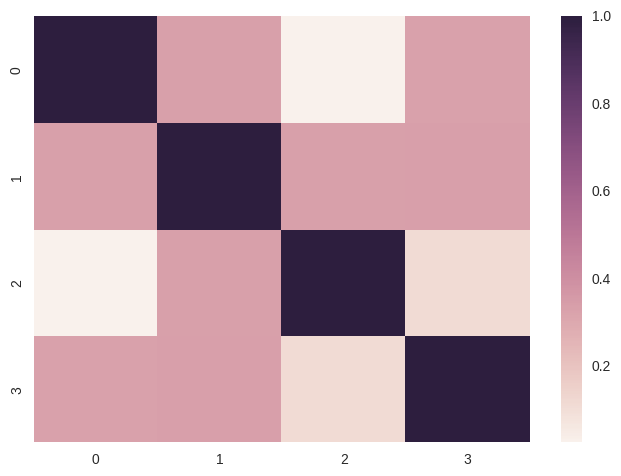

In [27]:
print w
sns.heatmap(m)

In [28]:
m.sum(axis=0)

array([1.69160921, 2.0118879 , 1.47430186, 1.78087001])

In [29]:
import spacy

In [30]:
word_embeddings = spacy.load('en', vectors='glove.6B.300d.txt')

In [48]:
q = word_embeddings(u'what')
print q

what


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
def sim(w1, w2):
    v1 = word_embeddings(w1)
    v2 = word_embeddings(w2)
    
    return cosine_similarity(v1.vector, v2.vector)

In [46]:
word1 = u'sweet'
word2 = u'sour'
print sim(word1, word2)

[[0.5948363]]


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
